**Import libraries to use**

In [25]:
library(dplyr)
library(ggplot2)
library(tidyverse) 
library(tidyr) 
suppressPackageStartupMessages(library(tidyverse)) 


**Import dataset**

In [11]:
zara_data <- read.csv('/kaggle/input/data-penjualan-zara/zara.csv', sep = ";", quote = "\"" ,stringsAsFactors = FALSE)

**Displayed the first 10 rows of key columns from the large dataset**

In [24]:
zara_data_small <- zara_data %>%
  select(Product.ID, Product.Category, Sales.Volume, price, Product.Position, Promotion)%>% 
    head(10)  

print(zara_data_small)


   Product.ID Product.Category Sales.Volume  price Product.Position Promotion
1      185102         Clothing         2823  19.99            Aisle        No
2      188771         Clothing          654 169.00            Aisle        No
3      180176         Clothing         2220 129.00          End-cap       Yes
4      112917         Clothing         1568 129.00            Aisle       Yes
5      192936         Clothing         2942 139.00          End-cap        No
6      117590         Clothing         2968  79.90          End-cap        No
7      189118         Clothing          952  69.99   Front of Store       Yes
8      182157         Clothing         2421 159.00            Aisle        No
9      141861         Clothing         1916 169.00            Aisle       Yes
10     137121         Clothing          656 169.00            Aisle        No


**Clean the data using backticks to handle column names that contain special characters or spaces**

In [13]:
zara_data_clean <- zara_data %>%
  drop_na(`Sales.Volume`) %>%  
  mutate(Promotion = as.factor(Promotion),
         Seasonal = as.factor(Seasonal))

**Data Visualization**

**Scatter plot of relationship between Sales Volume and Price**

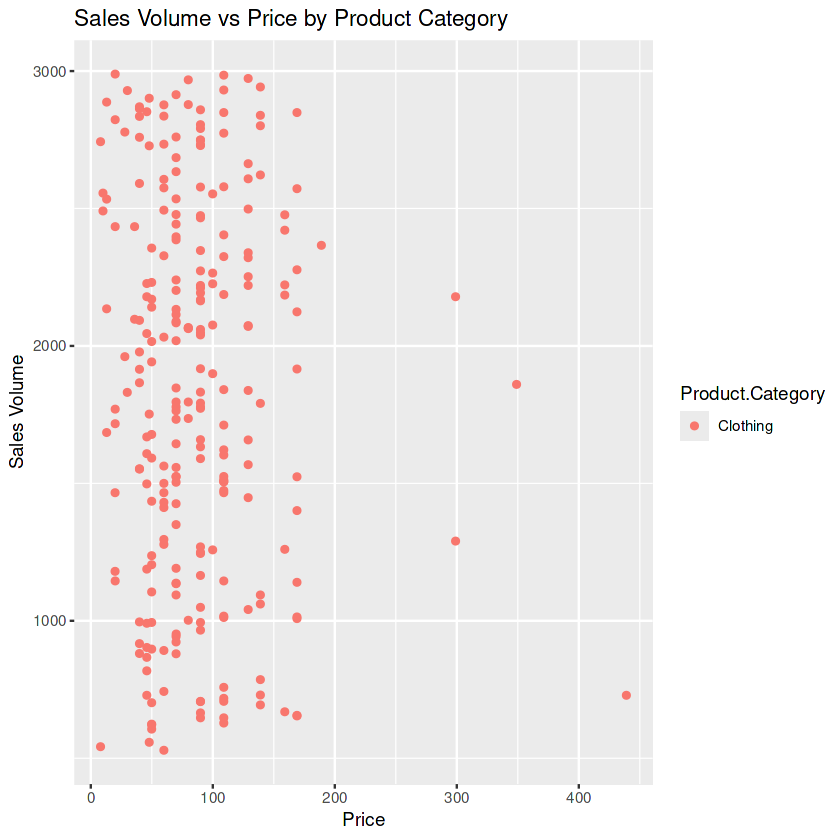

In [14]:
ggplot(zara_data_clean, aes(x = price, y = `Sales.Volume`, color = `Product.Category`)) +
  geom_point() +
  labs(title = "Sales Volume vs Price by Product Category", x = "Price", y = "Sales Volume")

**Boxplot of Sales Volume by Promotion**

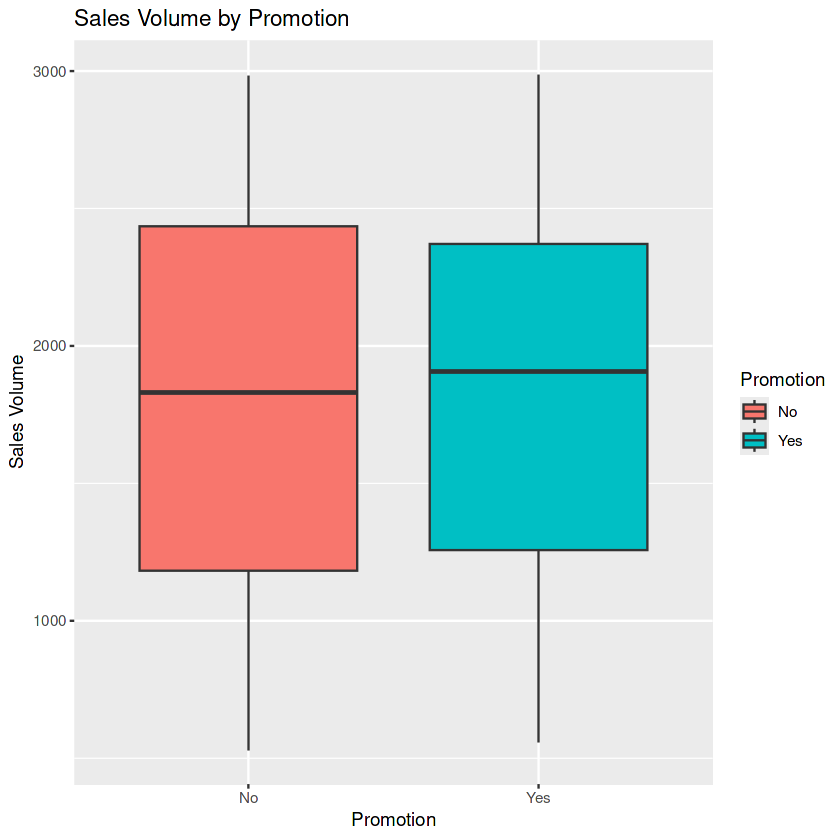

In [15]:
ggplot(zara_data_clean, aes(x = Promotion, y = `Sales.Volume`, fill = Promotion)) +
  geom_boxplot() +
  labs(title = "Sales Volume by Promotion", x = "Promotion", y = "Sales Volume")

**Bar plot of Product Counts by Position**

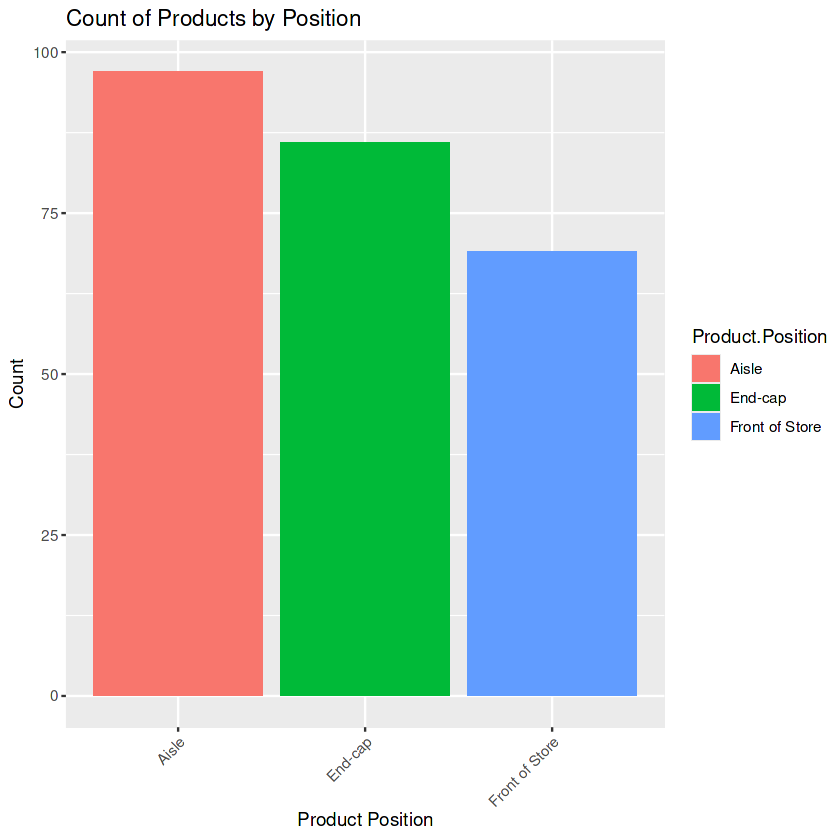

In [16]:
product_position_counts <- zara_data_clean %>%
  group_by(`Product.Position`) %>%
  summarize(Count = n())
ggplot(product_position_counts, aes(x = reorder(`Product.Position`, -Count), y = Count, fill = `Product.Position`)) +
  geom_bar(stat = "identity") +
  labs(title = "Count of Products by Position", x = "Product Position", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))